In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [21]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [22]:
train=pd.read_csv('../input/pubgedata/train_V2.csv/train_V2.csv')
#train= reduce_mem_usage(train)
#test=reduce_mem_usage(test)


In [23]:
print(train.shape)


(4446966, 29)


In [24]:
train = reduce_mem_usage(train)

Memory usage after optimization is: 288.39 MB
Decreased by 70.7%


In [25]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4446966.00,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4446966.0,4.446966e+06,4.446966e+06,4446966.000,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,NaN,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,NaN,3.496091e-03,NaN,2.386841e-02,7.918208e-03,NaN,3.660488e+00,6.064601e+02,NaN
std,5.885731e-01,1.715794e+00,NaN,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,NaN,7.337297e-02,NaN,1.673935e-01,9.261157e-02,NaN,2.456544e+00,7.397004e+02,0.000000e+00
min,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,155.125,2.000000e+00,0.000000e+00,1.999512e-01
50%,0.000000e+00,0.000000e+00,84.25,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,685.500,3.000000e+00,0.000000e+00,4.582520e-01
75%,0.000000e+00,2.000000e+00,186.00,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.910095e-01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1976.000,5.000000e+00,1.495000e+03,7.407227e-01
max,2.200000e+01,3.300000e+01,6616.00,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.070400e+04,1.800000e+01,3824.0,1.200000e+01,5.000000e+00,25776.000,2.360000e+02,2.013000e+03,1.000000e+00


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float16
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float16
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float16
 21  roadKills        int8   
 22  swimDistance     float16
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float16
 26  weaponsAcquired  int16  
 27  winPoints   

In [27]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500



**    DBNOs - Number of enemy players knocked.

    assists - Number of enemy players this player damaged that were killed by teammates.
    
    boosts - Number of boost items used.
    
    damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
    
    headshotKills - Number of enemy players killed with headshots.
    
    heals - Number of healing items used.
    
    Id - Player’s Id
    
    killPlace - Ranking in match of number of enemy players killed.
    
    killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
    
    killStreaks - Max number of enemy players killed in a short amount of time.
    
    kills - Number of enemy players killed.
    
    longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
    
    matchDuration - Duration of match in seconds.
    
    matchId - ID to identify match. There are no matches that are in both the training and testing set.
    
    matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”,
    “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
    
    rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
    
    revives - Number of times this player revived teammates.
    
    rideDistance - Total distance traveled in vehicles measured in meters.
    
    roadKills - Number of kills while in a vehicle.
    
    swimDistance - Total distance traveled by swimming measured in meters.
    
    teamKills - Number of times this player killed a teammate.
    
    vehicleDestroys - Number of vehicles destroyed.
    
    walkDistance - Total distance traveled on foot measured in meters.
    
    weaponsAcquired - Number of weapons picked up.
    
    winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
    
    groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
    
    numGroups - Number of groups we have data for in the match.
    
    maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
    
     winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match.


# Checking for null values and remove
# 

In [28]:
#find missing value in each columns
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [29]:
train.fillna(value = 1,
          inplace = True)

# * KILLS ANALYSIS

In [30]:
train['kills'].sum()

4112480

In [31]:
train['kills'].quantile(.7)

1.0

In [32]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(
    train['kills'].mean(),
    train['kills'].quantile(0.99), 
    train['kills'].max()))

The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


In [33]:

c=0
#num of person kills =0
for i in range (len(train['kills'])):
    if train['kills'][i]==0:  
             c+=1
print (c)

2529722


In [34]:
data1=train[train['kills']==0].copy()
print("{} players have won with kill zero !".format (len(data1[data1['winPlacePerc']==1])))

16667 players have won with kill zero !


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


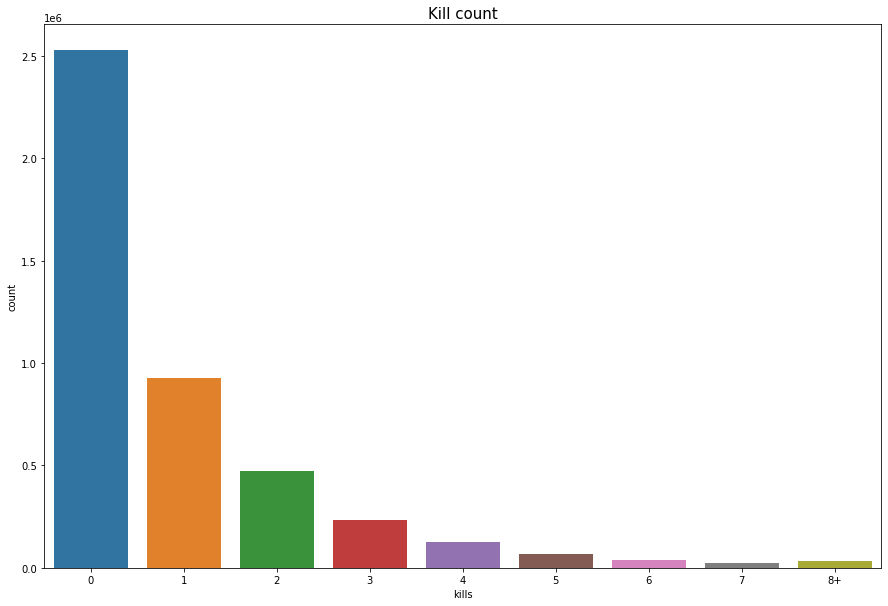

In [35]:
data=train.copy()
data.loc[data['kills']>data['kills'].quantile(0.99)]='8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill count",fontsize=15)
plt.show()
  


  
# i will just see the analysis of kill records between 0-8 becase 99% ids has less than 7 kills &
#there are many numbers over 8 ( maximum kill is 72. All the numbers above 8 are shown as 8+.


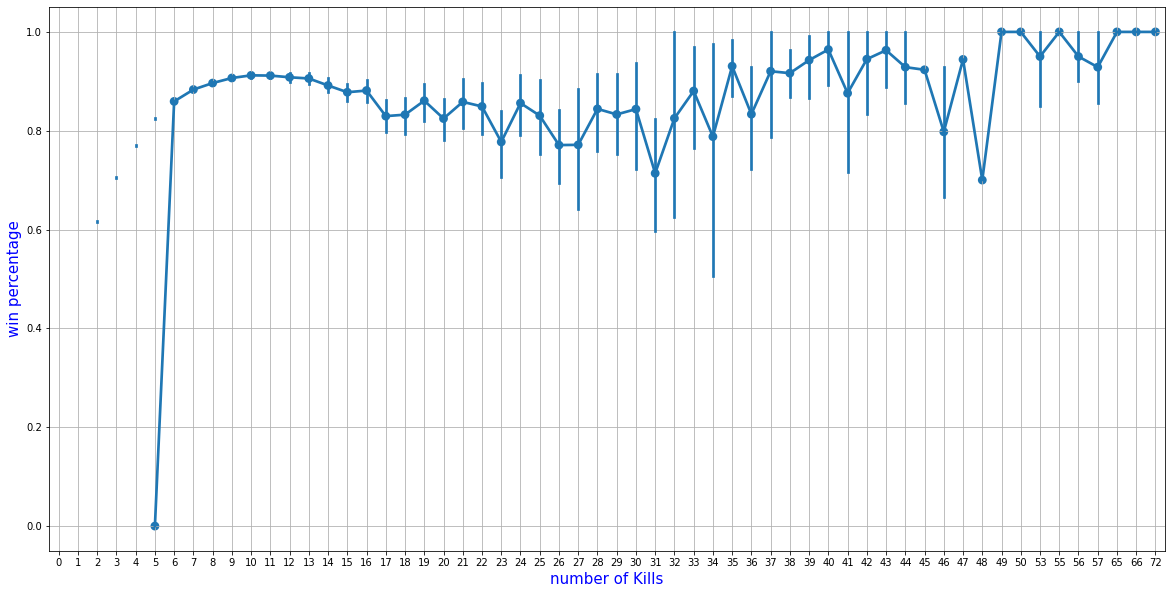

In [36]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=train)
plt.xlabel('number of Kills',fontsize=15,color='blue')
plt.ylabel('win percentage',fontsize=15,color='blue')
plt.grid()
plt.show()

increse kills increse percent win 


# TEAMKILLS ANALYSIS

In [37]:
print("The average person who kills team member {:.4f} , 99% of player have {} kills or less, while the most kills ever recorded is {}.".format(
    train['teamKills'].mean(),
    train['teamKills'].quantile(0.99), 
    train['teamKills'].max()))

The average person who kills team member 0.0239 , 99% of player have 1.0 kills or less, while the most kills ever recorded is 12.


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


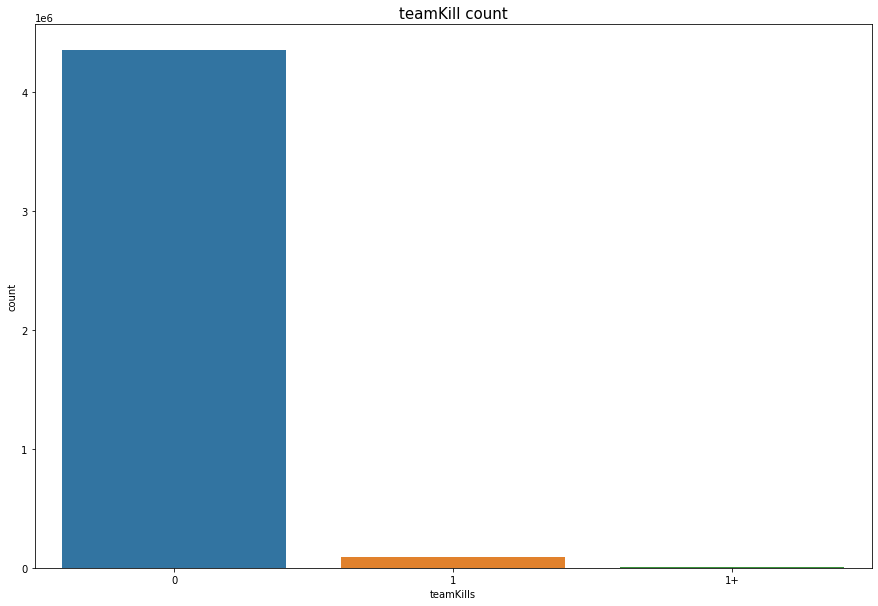

In [38]:
data=train.copy()
data.loc[data['teamKills']>data['teamKills'].quantile(0.99)]='1+'
plt.figure(figsize=(15,10))
sns.countplot(data['teamKills'].astype('str').sort_values())
plt.title("teamKill count",fontsize=15)
plt.show()


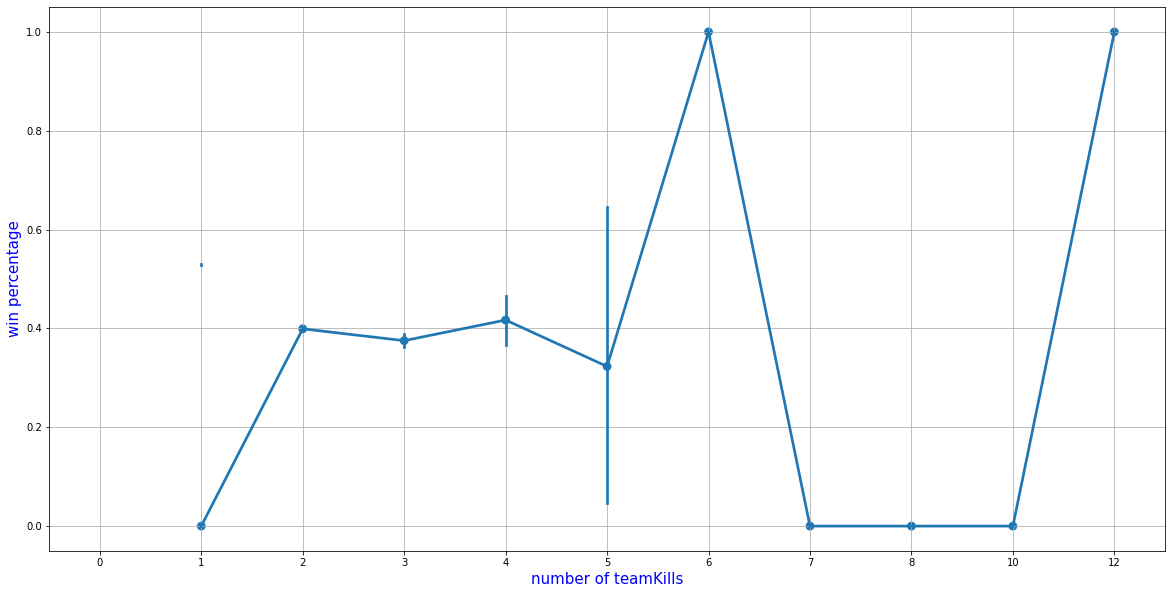

In [39]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='teamKills',y='winPlacePerc',data=train)
plt.xlabel('number of teamKills',fontsize=15,color='blue')
plt.ylabel('win percentage',fontsize=15,color='blue')
plt.grid()
plt.show()

num of teamkill bad win percent usually

# damageDealt analysis

In [40]:
print ('max = ',train['damageDealt'].max())
print ('quantile 99% = ',train['damageDealt'].quantile(0.99))

max =  6616.0
quantile 99% =  776.0


In [41]:
data1=train[train['damageDealt']==0].copy()
print("{} players have won without dealing damage!".format (len(data1[data1['winPlacePerc']==1])))

4771 players have won without dealing damage!


# walkDistance analysis

In [42]:
print ('max = ',train['walkDistance'].max())
print ('mean= ',train['walkDistance'].mean())
print ('quantile 99% = ',train['walkDistance'].quantile(0.9))

max =  25780.0
mean=  nan
quantile 99% =  2920.0


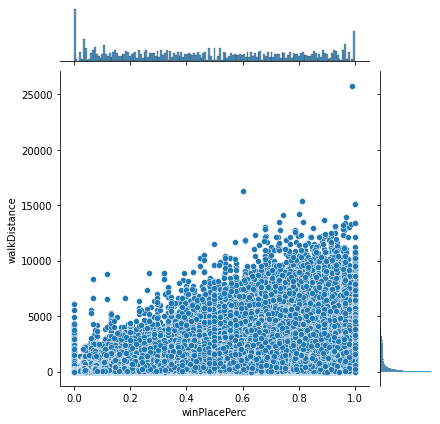

In [43]:
sns.jointplot(x="winPlacePerc",y="walkDistance",data=train)
plt.show()

walkdistance high relation with winplace 

# WAEAPONS ANALYSIS

In [44]:
print ('max num of weapon : ' ,train['weaponsAcquired'].max())
print ('min num of weapon : ',train['weaponsAcquired'].min())
print ('quantile 99% = ',train['weaponsAcquired'].quantile(0.9))

max num of weapon :  236
min num of weapon :  0
quantile 99% =  7.0


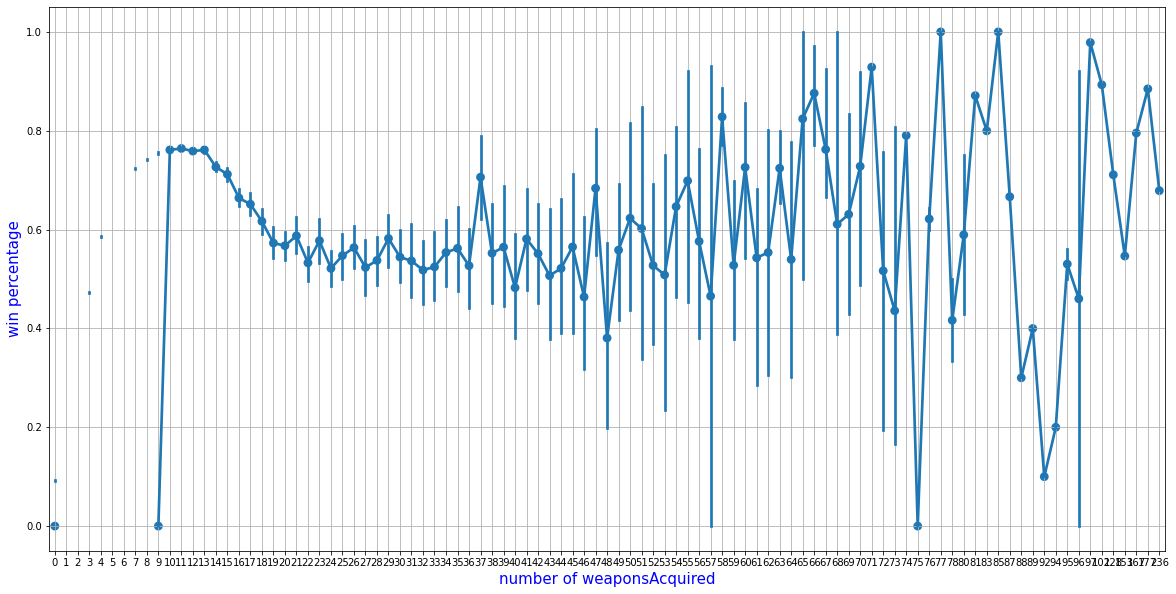

In [45]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=train)
plt.xlabel('number of weaponsAcquired',fontsize=15,color='blue')
plt.ylabel('win percentage',fontsize=15,color='blue')
plt.grid()
plt.show()

number of waepons high than 9 sometime increse percent of win 


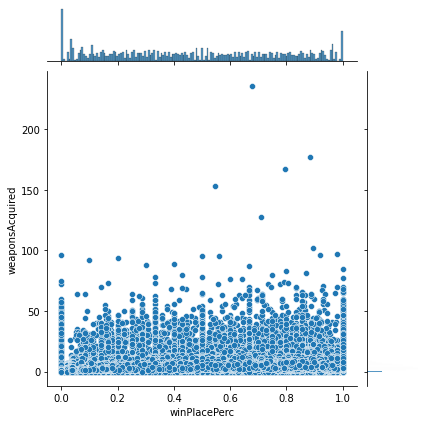

In [46]:
sns.jointplot(x="winPlacePerc",y="weaponsAcquired",data=train)
plt.show()

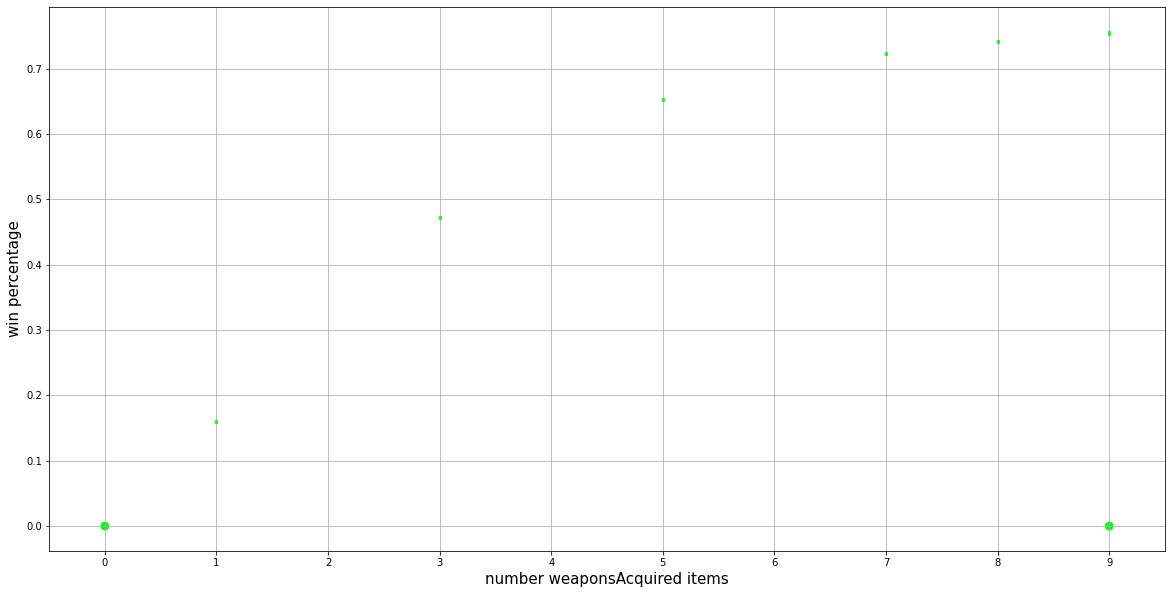

In [47]:
data=train.copy()
data=data[data['weaponsAcquired']<data['weaponsAcquired'].quantile(0.99)]
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=data,color='lime',alpha=0.8)
plt.xlabel('number weaponsAcquired items',fontsize=15)
plt.ylabel('win percentage',fontsize=15)
plt.grid()
plt.show()

# boosts

In [48]:
print("the avg person uses {} boosts items.".format(train["boosts"].mean()))
print("99% of people use {} or less boosts.".format(train['boosts'].quantile(0.99)))
print("the max boosts used {}.".format(train['boosts'].max()))

the avg person uses 1.1069077209045448 boosts items.
99% of people use 7.0 or less boosts.
the max boosts used 33.


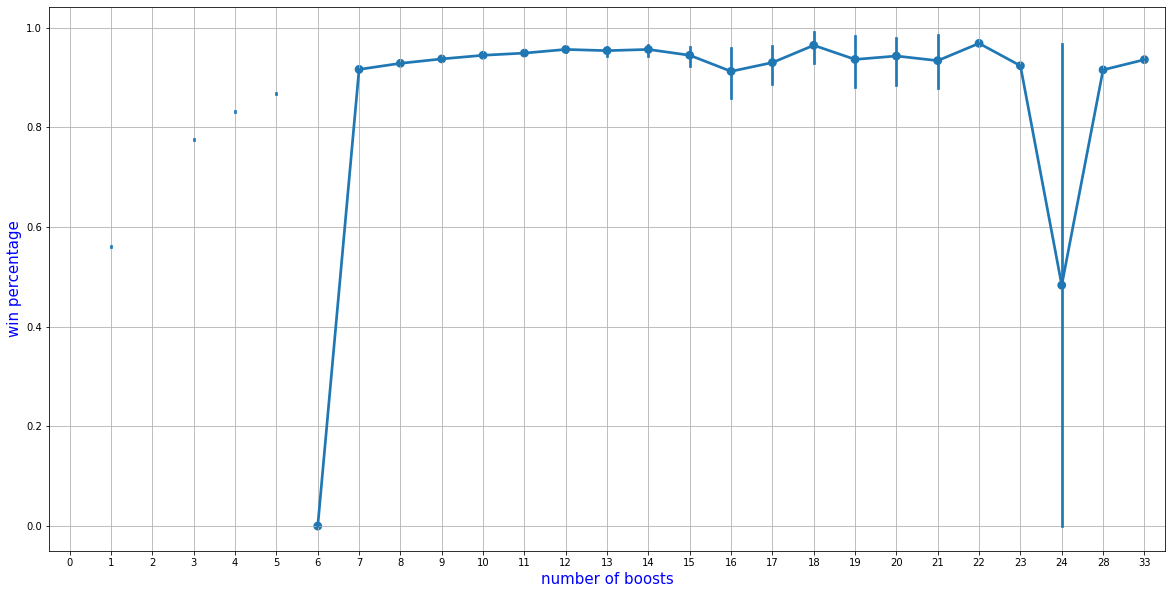

In [49]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='boosts',y='winPlacePerc',data=train)
plt.xlabel('number of boosts',fontsize=15,color='blue')
plt.ylabel('win percentage',fontsize=15,color='blue')
plt.grid()
plt.show()

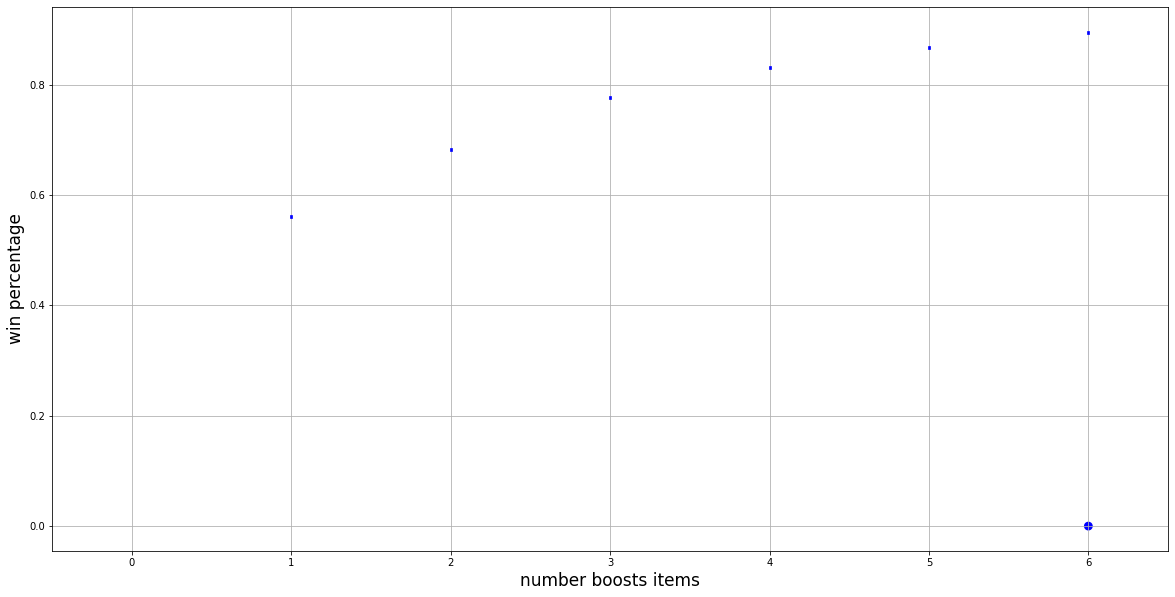

In [50]:

data=train.copy()
data=data[data['boosts']<data['boosts'].quantile(0.99)]
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.xlabel('number boosts items',fontsize=17)
plt.ylabel('win percentage',fontsize=17)
plt.grid()
plt.show()

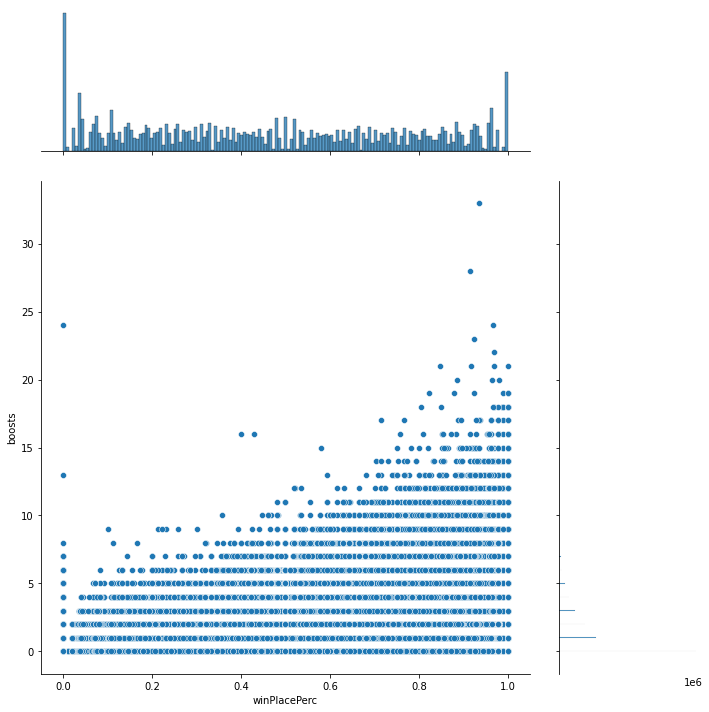

In [51]:


sns.jointplot(x="winPlacePerc",y="boosts",data=train, height=10,ratio=3)
plt.show()



# Heals

In [52]:
print("99% of people use {} or less heals.".format(train['heals'].quantile(0.99)))
print("the max heals used {}.".format(train['heals'].max()))

99% of people use 12.0 or less heals.
the max heals used 80.


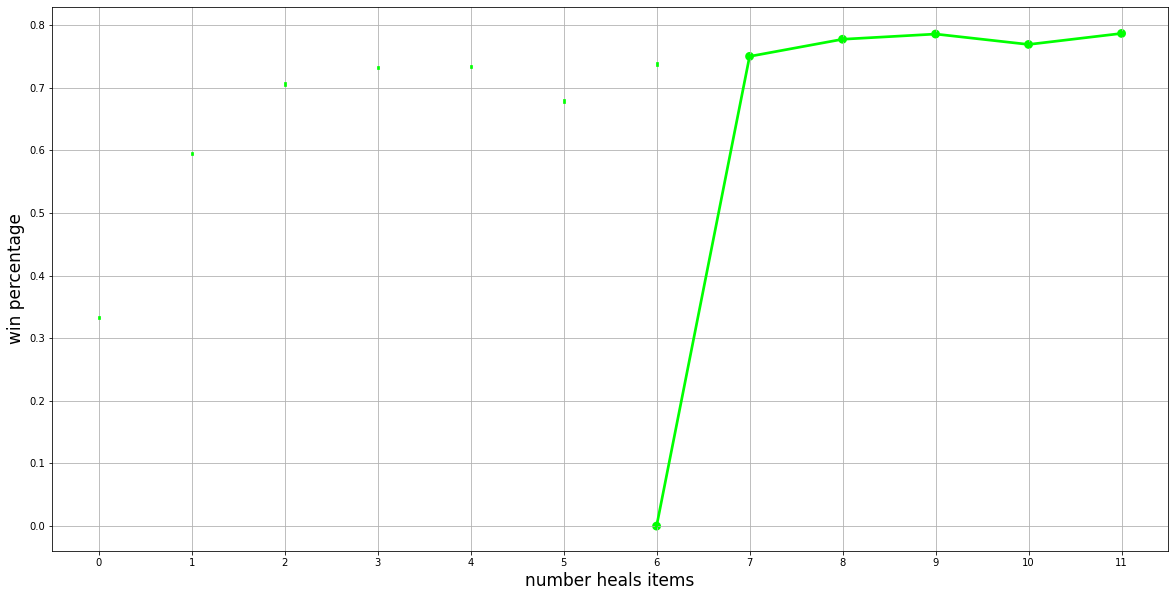

In [53]:
data=train.copy()
data=data[data['heals']<data['heals'].quantile(0.99)]
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
plt.xlabel('number heals items',fontsize=17)
plt.ylabel('win percentage',fontsize=17)
plt.grid()
plt.show()

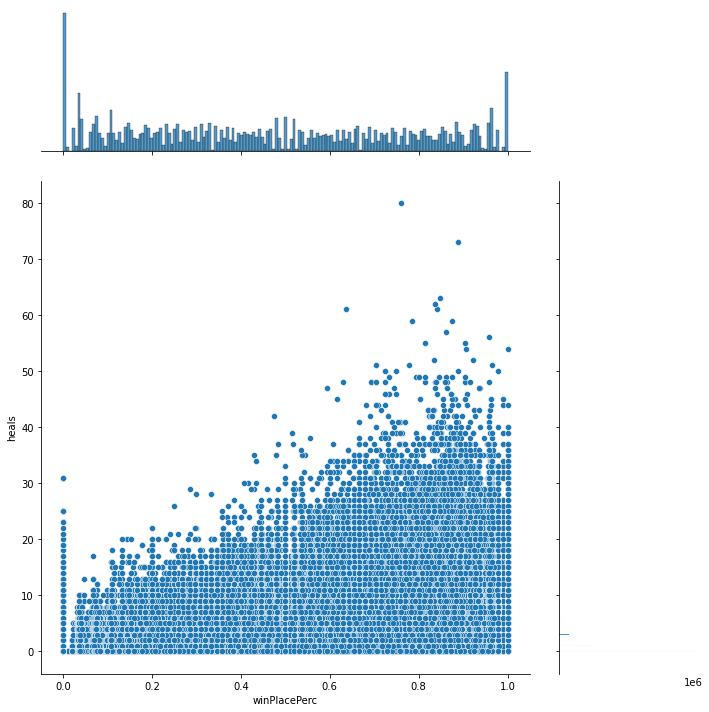

In [54]:
sns.jointplot(x="winPlacePerc",y="heals",data=train, height=10,ratio=3)
plt.show()





# matchDuration &killStreaks relation

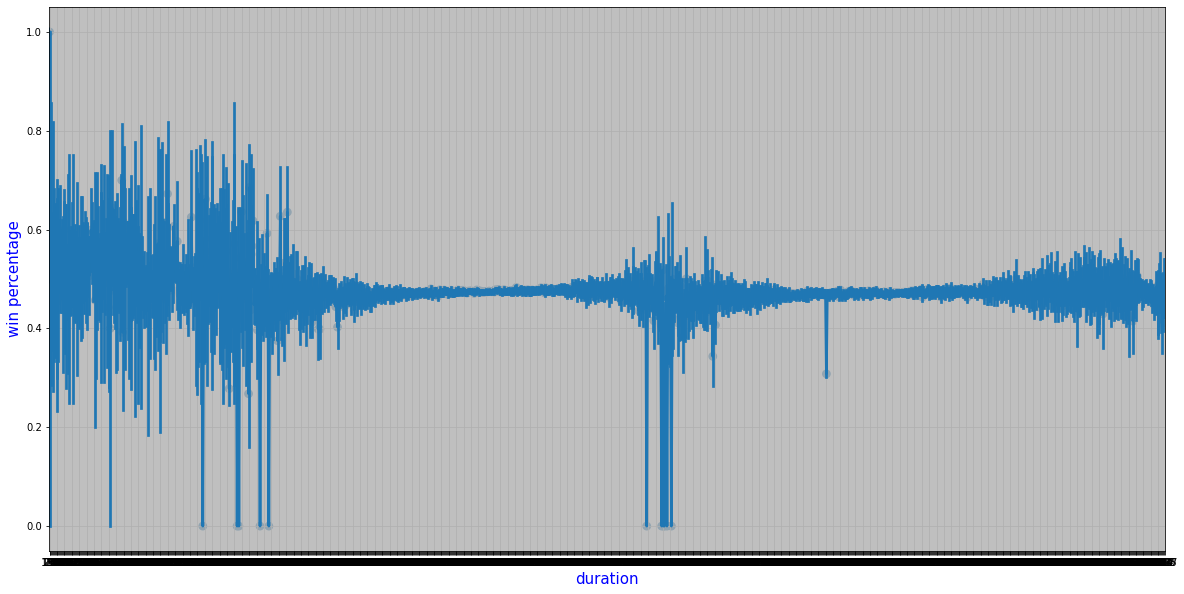

In [55]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='matchDuration',y='winPlacePerc',data=train)
plt.xlabel('duration',fontsize=15,color='blue')
plt.ylabel('win percentage',fontsize=15,color='blue')
plt.grid()
plt.show()

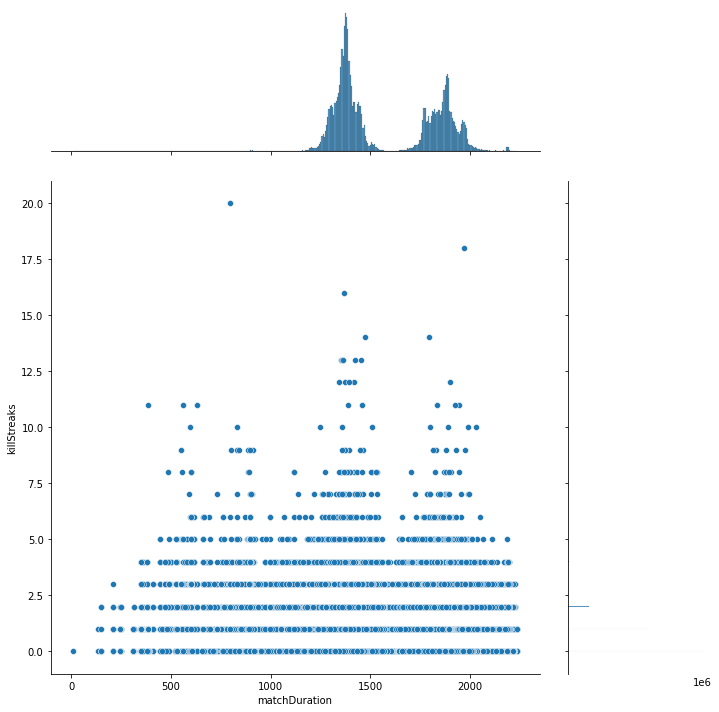

In [56]:
sns.jointplot(x="matchDuration",y="killStreaks",data=train, height=10,ratio=3)
plt.show()

# correlation

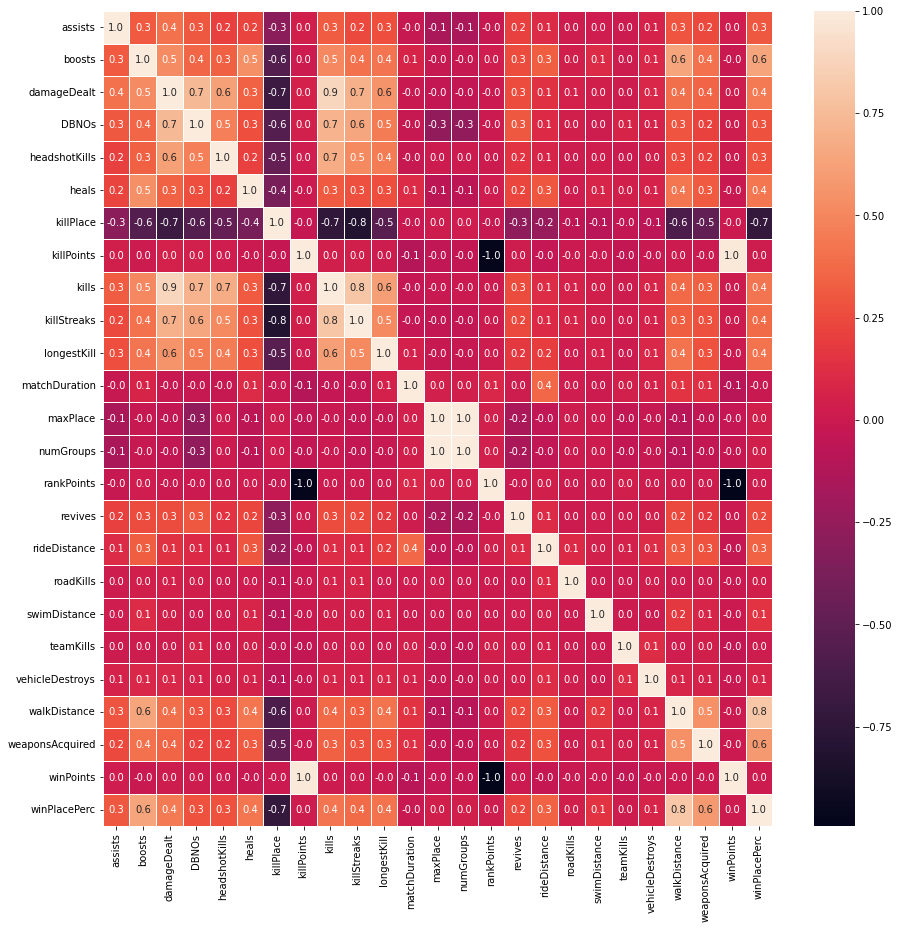

In [57]:
#correlation
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [58]:
cols = train.corr().nlargest(6, 'winPlacePerc') #to get the first rows ordered by columns in descending order.
cols

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
winPlacePerc,0.299439,0.634232,0.440505,0.279968,0.277722,0.427856,-0.719069,0.012909,0.419915,0.377565,...,0.240879,0.342914,0.034544,0.149606,0.015942,0.073436,0.810885,0.583805,0.007062,1.000000
walkDistance,0.290306,0.640150,0.398199,0.284660,0.250982,0.430266,-0.590235,0.004631,0.374774,0.327639,...,0.236796,0.310936,0.016736,0.167509,0.024858,0.076237,1.000000,0.541222,-0.002043,0.810885
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107992,0.013068,0.087387,0.640150,0.406609,-0.007644,0.634232
weaponsAcquired,0.243882,0.406609,0.353249,0.218161,0.217552,0.309071,-0.490143,-0.003978,0.336414,0.275373,...,0.167281,0.282246,0.016494,0.075698,0.035918,0.061012,0.541222,1.000000,-0.003815,0.583805
damageDealt,0.406726,0.521947,1.000000,0.735762,0.613409,0.342987,-0.677398,0.049904,0.888784,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353249,0.017762,0.440505
heals,0.228556,0.535854,0.342987,0.265485,0.199918,1.000000,-0.386032,-0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079586,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427856


In [59]:
s=cols['winPlacePerc'].index  #find index of coloum 
print(s)
d=train [['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired','damageDealt', 'heals']]


Index(['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired',
       'damageDealt', 'heals'],
      dtype='object')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


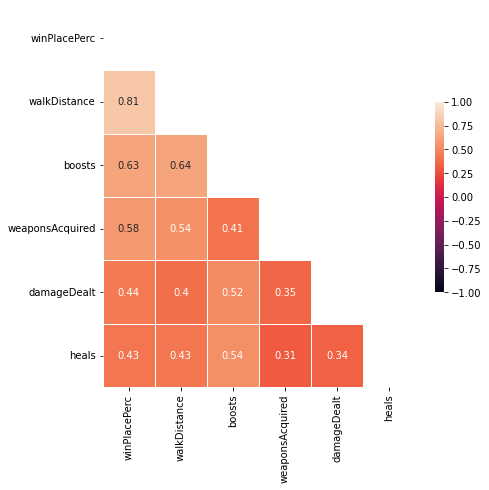

In [60]:
corr = d.corr()
fig, ax = plt.subplots( figsize=(7,7) )
#returns  corr matrix as array of zeros and upper triangle of the array set =true
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            annot = True,  #explain annotations for the correlation values
            mask=mask,      
            linewidths=.5,  
            cbar_kws={"shrink": .5}, #size shrink 
            vmin = -1,vmax = 1  
           ) 
plt.show()



/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


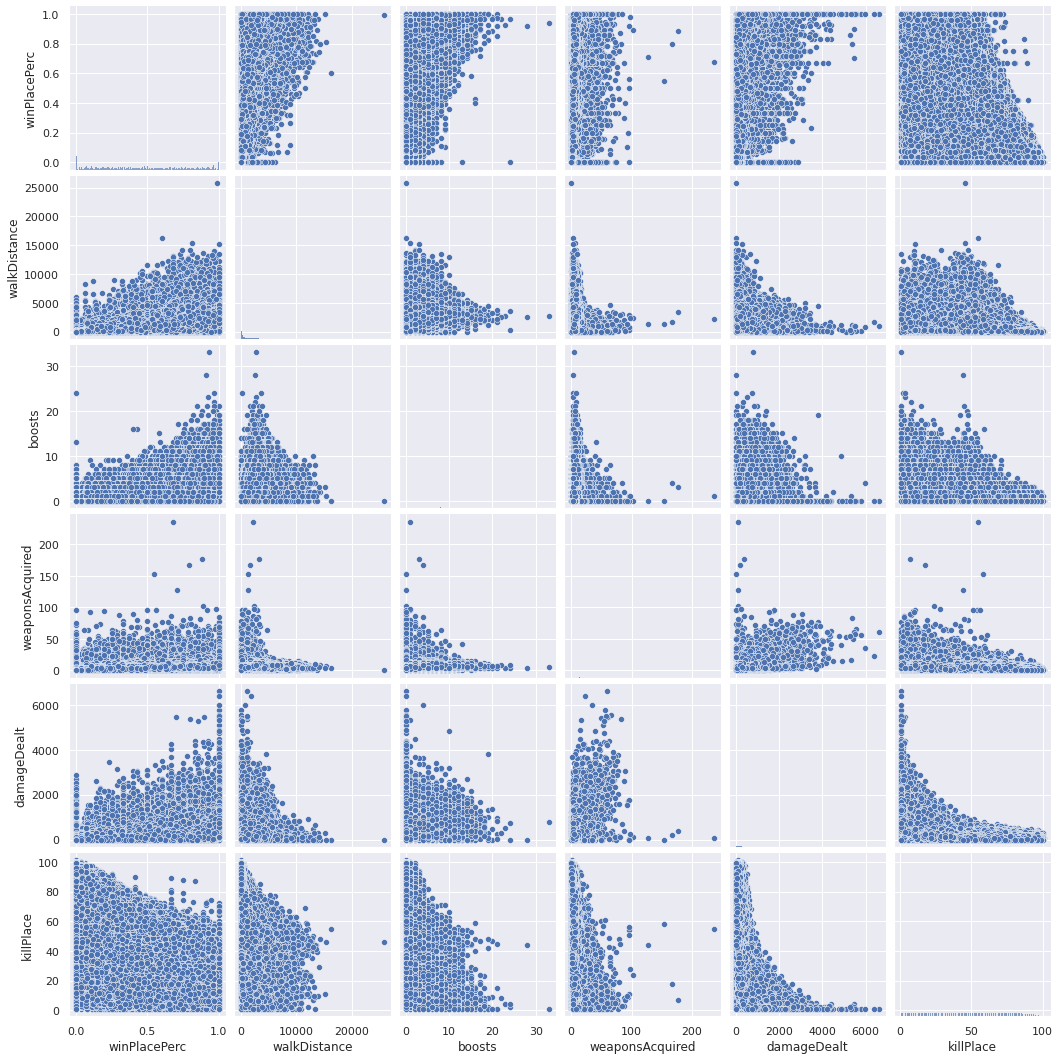

In [61]:
sns.set()
cols=['winPlacePerc','walkDistance','boosts','weaponsAcquired','damageDealt','killPlace']
sns.pairplot(train[cols],size=2.5)
plt.show()

In [62]:
y =d[['winPlacePerc']]
x = d[['walkDistance','boosts', 'weaponsAcquired','damageDealt', 'heals']]
x = reduce_mem_usage(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Memory usage after optimization is: 33.93 MB
Decreased by 0.0%
(3557572, 5) (889394, 5) (3557572, 1) (889394, 1)


In [63]:


y_test.fillna(value = 1,
          inplace = True)
y_train.fillna(value = 1,
          inplace = True)
y_test.isna().sum()


winPlacePerc    0
dtype: int64

# **Training model
# **

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X_train)
train_x=scaler.transform(X_train)
scaler=MinMaxScaler().fit(y_train)
train_y=scaler.transform(y_train)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators =220,min_samples_leaf=3,n_jobs=-1)

model.fit(X_train[:989394],y_train[:989394])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import mean_absolute_error
print ('Accuracy train : ', model.score(X_train[:989394], y_train[:989394])*100)
print ('moe : ' ,mean_absolute_error(y_pred, y_test))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print ("losss fun : ",rmse)
print ("score test  : ",r2*100)

In [70]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train[:889394],y_train[:889394])

DecisionTreeRegressor()

import lightgbm as ltb
model = ltb.LGBMRegressor(objective='mae', n_estimators=250,  
                     learning_rate=0.3, num_leaves=250 ,
                      verbose=0,force_col_wise=True)
model.fit(X_train,y_train,eval_metric='auc,loss', 
          eval_set=[(X_test, y_test)], early_stopping_rounds=10)

In [71]:
y_pred = model.predict(X_test)
y_pred

array([0.51850586, 0.43591309, 0.45825195, ..., 0.625     , 0.59179688,
       0.82128906])

In [72]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import mean_absolute_error
print ('Accuracy train : ', model.score(X_train, y_train)*100)
print ('mean_absolute_error : ' ,mean_absolute_error(y_pred, y_test))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print ("losss fun : ",rmse)
print ("score test  : ",r2*100)

Accuracy train :  67.8496984632177
mean_absolute_error :  0.14712908249890352
losss fun :  0.1979518994612815
score test  :  58.53875400947115
